In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential, load_model
from keras.layers import Activation, Dense, Dropout, Flatten
from keras import backend
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [42]:
#Pandas DataFrame
dataset = pd.read_csv("heston_matteo.csv")
dataset = dataset.dropna()

X = dataset.iloc[:, :8]
y = dataset.iloc[:, 8].to_numpy()

In [43]:
from sklearn.preprocessing import MinMaxScaler

scale_x = MinMaxScaler().fit(X)
X = scale_x.transform(X)
y = y.reshape(len(y), 1)
scale_y = MinMaxScaler().fit(y)
y = scale_y.transform(y)

# ti conviene salvarti le trasformazioni cosi`
import joblib
joblib.dump(scale_x, "heston_x_scaler_matteo.save")
joblib.dump(scale_y, "heston_y_scaler_matteo.save")

['heston_y_scaler_matteo.save']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(4320, 8) (4320, 1)
(1080, 8) (1080, 1)


In [45]:
#create model

model = Sequential()
model.add(Dense(80, input_dim=8, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(40, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(20, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(5, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(1, kernel_initializer='normal'))

In [46]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse', 'mae'])

In [47]:
history = model.fit(X_train, y_train, epochs=5000, batch_size=50, verbose=1)

Epoch 1/5000
4320/4320 [==============================] - 2s 503us/step - loss: 0.3416 - mse: 0.1811 - mae: 0.3416
Epoch 2/5000
4320/4320 [==============================] - 1s 118us/step - loss: 0.2233 - mse: 0.0745 - mae: 0.2233
Epoch 3/5000
4320/4320 [==============================] - 1s 119us/step - loss: 0.2213 - mse: 0.0702 - mae: 0.2213
Epoch 4/5000
4320/4320 [==============================] - 1s 127us/step - loss: 0.2213 - mse: 0.0702 - mae: 0.2213
Epoch 5/5000
4320/4320 [==============================] - 1s 121us/step - loss: 0.2212 - mse: 0.0703 - mae: 0.2212
Epoch 6/5000
4320/4320 [==============================] - 1s 121us/step - loss: 0.2211 - mse: 0.0700 - mae: 0.2211
Epoch 7/5000
4320/4320 [==============================] - 1s 122us/step - loss: 0.2207 - mse: 0.0701 - mae: 0.2207
Epoch 8/5000
4320/4320 [==============================] - 1s 120us/step - loss: 0.2196 - mse: 0.0696 - mae: 0.2196
Epoch 9/5000
4320/4320 [==============================] - 1s 127us/step - loss: 

4320/4320 [==============================] - 0s 101us/step - loss: 0.0052 - mse: 4.8748e-05 - mae: 0.0052
Epoch 70/5000
4320/4320 [==============================] - 0s 101us/step - loss: 0.0049 - mse: 4.4954e-05 - mae: 0.0049
Epoch 71/5000
4320/4320 [==============================] - 0s 101us/step - loss: 0.0051 - mse: 4.6851e-05 - mae: 0.0051
Epoch 72/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0051 - mse: 4.6760e-05 - mae: 0.0051
Epoch 73/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0051 - mse: 4.7031e-05 - mae: 0.0051
Epoch 74/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0053 - mse: 4.9764e-05 - mae: 0.0053
Epoch 75/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0051 - mse: 4.7594e-05 - mae: 0.0051
Epoch 76/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0053 - mse: 4.8955e-05 - mae: 0.0053
Epoch 77/5000
4320/4320 [=============================

4320/4320 [==============================] - 0s 104us/step - loss: 0.0049 - mse: 4.3593e-05 - mae: 0.0049
Epoch 138/5000
4320/4320 [==============================] - 0s 106us/step - loss: 0.0046 - mse: 4.0954e-05 - mae: 0.0046
Epoch 139/5000
4320/4320 [==============================] - 0s 106us/step - loss: 0.0051 - mse: 4.6969e-05 - mae: 0.0051
Epoch 140/5000
4320/4320 [==============================] - 0s 107us/step - loss: 0.0048 - mse: 4.2910e-05 - mae: 0.0048
Epoch 141/5000
4320/4320 [==============================] - 1s 149us/step - loss: 0.0046 - mse: 4.0988e-05 - mae: 0.0046
Epoch 142/5000
4320/4320 [==============================] - 1s 128us/step - loss: 0.0048 - mse: 4.2026e-05 - mae: 0.0048
Epoch 143/5000
4320/4320 [==============================] - 1s 127us/step - loss: 0.0046 - mse: 4.0629e-05 - mae: 0.0046
Epoch 144/5000
4320/4320 [==============================] - 0s 105us/step - loss: 0.0046 - mse: 4.0632e-05 - mae: 0.0046
Epoch 145/5000
4320/4320 [=====================

4320/4320 [==============================] - 0s 104us/step - loss: 0.0045 - mse: 3.7838e-05 - mae: 0.0045
Epoch 205/5000
4320/4320 [==============================] - 0s 108us/step - loss: 0.0047 - mse: 4.0228e-05 - mae: 0.0047
Epoch 206/5000
4320/4320 [==============================] - 0s 107us/step - loss: 0.0044 - mse: 3.6432e-05 - mae: 0.0044
Epoch 207/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0048 - mse: 4.0250e-05 - mae: 0.0048
Epoch 208/5000
4320/4320 [==============================] - 0s 105us/step - loss: 0.0043 - mse: 3.4823e-05 - mae: 0.0043
Epoch 209/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0044 - mse: 3.6408e-05 - mae: 0.0044
Epoch 210/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0044 - mse: 3.6736e-05 - mae: 0.0044
Epoch 211/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0043 - mse: 3.4740e-05 - mae: 0.0043
Epoch 212/5000
4320/4320 [=====================

4320/4320 [==============================] - 0s 105us/step - loss: 0.0046 - mse: 3.6182e-05 - mae: 0.0046
Epoch 272/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0041 - mse: 3.0186e-05 - mae: 0.0041
Epoch 273/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0042 - mse: 3.1401e-05 - mae: 0.0042
Epoch 274/5000
4320/4320 [==============================] - 0s 101us/step - loss: 0.0040 - mse: 2.9992e-05 - mae: 0.0040
Epoch 275/5000
4320/4320 [==============================] - 0s 101us/step - loss: 0.0039 - mse: 2.8094e-05 - mae: 0.0039
Epoch 276/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0042 - mse: 3.1323e-05 - mae: 0.0042
Epoch 277/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0040 - mse: 3.0042e-05 - mae: 0.0040
Epoch 278/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0043 - mse: 3.2500e-05 - mae: 0.0043
Epoch 279/5000
4320/4320 [=====================

4320/4320 [==============================] - 0s 103us/step - loss: 0.0041 - mse: 2.9972e-05 - mae: 0.0041
Epoch 339/5000
4320/4320 [==============================] - 1s 120us/step - loss: 0.0039 - mse: 2.7797e-05 - mae: 0.0039
Epoch 340/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0038 - mse: 2.6711e-05 - mae: 0.0038
Epoch 341/5000
4320/4320 [==============================] - 0s 105us/step - loss: 0.0038 - mse: 2.6745e-05 - mae: 0.0038
Epoch 342/5000
4320/4320 [==============================] - 0s 106us/step - loss: 0.0038 - mse: 2.7391e-05 - mae: 0.0038
Epoch 343/5000
4320/4320 [==============================] - 0s 106us/step - loss: 0.0040 - mse: 2.8511e-05 - mae: 0.0040
Epoch 344/5000
4320/4320 [==============================] - 1s 133us/step - loss: 0.0039 - mse: 2.8412e-05 - mae: 0.0039
Epoch 345/5000
4320/4320 [==============================] - 0s 106us/step - loss: 0.0039 - mse: 2.8052e-05 - mae: 0.0039
Epoch 346/5000
4320/4320 [=====================

4320/4320 [==============================] - 0s 102us/step - loss: 0.0038 - mse: 2.6535e-05 - mae: 0.0038
Epoch 406/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0035 - mse: 2.3813e-05 - mae: 0.0035
Epoch 407/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0037 - mse: 2.5334e-05 - mae: 0.0037
Epoch 408/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0037 - mse: 2.5245e-05 - mae: 0.0037
Epoch 409/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0040 - mse: 2.8304e-05 - mae: 0.0040
Epoch 410/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0036 - mse: 2.4310e-05 - mae: 0.0036
Epoch 411/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0036 - mse: 2.4449e-05 - mae: 0.0036
Epoch 412/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0037 - mse: 2.5432e-05 - mae: 0.0037
Epoch 413/5000
4320/4320 [=====================

4320/4320 [==============================] - 0s 102us/step - loss: 0.0029 - mse: 1.3981e-05 - mae: 0.0029
Epoch 473/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0026 - mse: 1.2217e-05 - mae: 0.0026
Epoch 474/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0026 - mse: 1.1818e-05 - mae: 0.0026
Epoch 475/5000
4320/4320 [==============================] - 0s 99us/step - loss: 0.0026 - mse: 1.1835e-05 - mae: 0.0026
Epoch 476/5000
4320/4320 [==============================] - 0s 99us/step - loss: 0.0025 - mse: 1.0979e-05 - mae: 0.0025
Epoch 477/5000
4320/4320 [==============================] - 0s 98us/step - loss: 0.0025 - mse: 1.0972e-05 - mae: 0.0025
Epoch 478/5000
4320/4320 [==============================] - 0s 99us/step - loss: 0.0025 - mse: 1.0827e-05 - mae: 0.0025
Epoch 479/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0025 - mse: 1.0221e-05 - mae: 0.0025
Epoch 480/5000
4320/4320 [=========================

4320/4320 [==============================] - 0s 99us/step - loss: 0.0014 - mse: 3.2482e-06 - mae: 0.0014
Epoch 541/5000
4320/4320 [==============================] - 0s 98us/step - loss: 0.0014 - mse: 3.3878e-06 - mae: 0.0014
Epoch 542/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0014 - mse: 3.1566e-06 - mae: 0.0014
Epoch 543/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0017 - mse: 4.4491e-06 - mae: 0.0017
Epoch 544/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0017 - mse: 4.8274e-06 - mae: 0.0017
Epoch 545/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0014 - mse: 3.2766e-06 - mae: 0.0014
Epoch 546/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0014 - mse: 3.2473e-06 - mae: 0.0014
Epoch 547/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0016 - mse: 3.8447e-06 - mae: 0.0016
Epoch 548/5000
4320/4320 [=======================

4320/4320 [==============================] - 0s 103us/step - loss: 0.0013 - mse: 2.9262e-06 - mae: 0.0013
Epoch 608/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0014 - mse: 3.3219e-06 - mae: 0.0014
Epoch 609/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0017 - mse: 4.7723e-06 - mae: 0.0017
Epoch 610/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0015 - mse: 3.5292e-06 - mae: 0.0015
Epoch 611/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0014 - mse: 3.0099e-06 - mae: 0.0014
Epoch 612/5000
4320/4320 [==============================] - 0s 101us/step - loss: 0.0013 - mse: 2.9682e-06 - mae: 0.0013
Epoch 613/5000
4320/4320 [==============================] - 0s 99us/step - loss: 0.0014 - mse: 3.0179e-06 - mae: 0.0014
Epoch 614/5000
4320/4320 [==============================] - 0s 101us/step - loss: 0.0017 - mse: 4.4921e-06 - mae: 0.0017
Epoch 615/5000
4320/4320 [======================

4320/4320 [==============================] - 0s 100us/step - loss: 0.0014 - mse: 2.8960e-06 - mae: 0.0014
Epoch 675/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0014 - mse: 3.0155e-06 - mae: 0.0014
Epoch 676/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0015 - mse: 3.8020e-06 - mae: 0.0015
Epoch 677/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0013 - mse: 2.7649e-06 - mae: 0.0013
Epoch 678/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0013 - mse: 2.5669e-06 - mae: 0.0013
Epoch 679/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0017 - mse: 5.1001e-06 - mae: 0.0017
Epoch 680/5000
4320/4320 [==============================] - 0s 99us/step - loss: 0.0014 - mse: 3.1540e-06 - mae: 0.0014
Epoch 681/5000
4320/4320 [==============================] - 0s 98us/step - loss: 0.0013 - mse: 2.6398e-06 - mae: 0.0013
Epoch 682/5000
4320/4320 [=======================

4320/4320 [==============================] - 0s 103us/step - loss: 0.0014 - mse: 3.1515e-06 - mae: 0.0014
Epoch 742/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0013 - mse: 2.8168e-06 - mae: 0.0013
Epoch 743/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0014 - mse: 3.2349e-06 - mae: 0.0014
Epoch 744/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0012 - mse: 2.4205e-06 - mae: 0.0012
Epoch 745/5000
4320/4320 [==============================] - 0s 99us/step - loss: 0.0013 - mse: 2.5540e-06 - mae: 0.0013
Epoch 746/5000
4320/4320 [==============================] - 0s 101us/step - loss: 0.0011 - mse: 1.9978e-06 - mae: 0.0011
Epoch 747/5000
4320/4320 [==============================] - 0s 99us/step - loss: 0.0013 - mse: 2.7500e-06 - mae: 0.0013
Epoch 748/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0013 - mse: 2.5904e-06 - mae: 0.0013
Epoch 749/5000
4320/4320 [=======================

4320/4320 [==============================] - 0s 99us/step - loss: 0.0013 - mse: 2.5312e-06 - mae: 0.0013
Epoch 809/5000
4320/4320 [==============================] - 0s 99us/step - loss: 0.0014 - mse: 2.9134e-06 - mae: 0.0014
Epoch 810/5000
4320/4320 [==============================] - 0s 101us/step - loss: 0.0013 - mse: 2.9655e-06 - mae: 0.0013
Epoch 811/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0014 - mse: 3.0588e-06 - mae: 0.0014
Epoch 812/5000
4320/4320 [==============================] - 0s 101us/step - loss: 0.0013 - mse: 2.9398e-06 - mae: 0.0013
Epoch 813/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0014 - mse: 2.9372e-06 - mae: 0.0014
Epoch 814/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0013 - mse: 2.7249e-06 - mae: 0.0013
Epoch 815/5000
4320/4320 [==============================] - 0s 106us/step - loss: 0.0013 - mse: 2.6707e-06 - mae: 0.0013
Epoch 816/5000
4320/4320 [=======================

4320/4320 [==============================] - 0s 99us/step - loss: 0.0011 - mse: 2.0445e-06 - mae: 0.0011
Epoch 876/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0012 - mse: 2.1904e-06 - mae: 0.0012
Epoch 877/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0013 - mse: 2.8303e-06 - mae: 0.0013
Epoch 878/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0012 - mse: 2.2375e-06 - mae: 0.0012
Epoch 879/5000
4320/4320 [==============================] - 0s 98us/step - loss: 0.0013 - mse: 2.9139e-06 - mae: 0.0013
Epoch 880/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0011 - mse: 1.9372e-06 - mae: 0.0011
Epoch 881/5000
4320/4320 [==============================] - 0s 98us/step - loss: 0.0012 - mse: 2.1797e-06 - mae: 0.0012
Epoch 882/5000
4320/4320 [==============================] - 0s 98us/step - loss: 0.0012 - mse: 2.1188e-06 - mae: 0.0012
Epoch 883/5000
4320/4320 [=========================

4320/4320 [==============================] - 0s 104us/step - loss: 0.0016 - mse: 3.8558e-06 - mae: 0.0016
Epoch 943/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0011 - mse: 1.9254e-06 - mae: 0.0011
Epoch 944/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0011 - mse: 2.1235e-06 - mae: 0.0011
Epoch 945/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0013 - mse: 2.6070e-06 - mae: 0.0013
Epoch 946/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0012 - mse: 2.2226e-06 - mae: 0.0012
Epoch 947/5000
4320/4320 [==============================] - 0s 105us/step - loss: 0.0010 - mse: 1.7617e-06 - mae: 0.0010
Epoch 948/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0012 - mse: 2.1978e-06 - mae: 0.0012
Epoch 949/5000
4320/4320 [==============================] - 0s 105us/step - loss: 0.0012 - mse: 2.2850e-06 - mae: 0.0012
Epoch 950/5000
4320/4320 [=====================

4320/4320 [==============================] - 0s 98us/step - loss: 0.0012 - mse: 2.1195e-06 - mae: 0.0012
Epoch 1010/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0012 - mse: 2.4507e-06 - mae: 0.0012
Epoch 1011/5000
4320/4320 [==============================] - 0s 101us/step - loss: 0.0011 - mse: 2.0028e-06 - mae: 0.0011
Epoch 1012/5000
4320/4320 [==============================] - 0s 98us/step - loss: 0.0012 - mse: 2.4774e-06 - mae: 0.0012
Epoch 1013/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0011 - mse: 2.0321e-06 - mae: 0.0011
Epoch 1014/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0011 - mse: 1.8413e-06 - mae: 0.0011
Epoch 1015/5000
4320/4320 [==============================] - 0s 105us/step - loss: 0.0010 - mse: 1.6382e-06 - mae: 0.0010
Epoch 1016/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0011 - mse: 1.8874e-06 - mae: 0.0011
Epoch 1017/5000
4320/4320 [===============

4320/4320 [==============================] - 0s 99us/step - loss: 0.0012 - mse: 2.1558e-06 - mae: 0.0012
Epoch 1076/5000
4320/4320 [==============================] - 0s 99us/step - loss: 0.0011 - mse: 2.0574e-06 - mae: 0.0011
Epoch 1077/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0015 - mse: 3.6259e-06 - mae: 0.0015
Epoch 1078/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0014 - mse: 3.3070e-06 - mae: 0.0014
Epoch 1079/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0012 - mse: 2.3431e-06 - mae: 0.0012
Epoch 1080/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0011 - mse: 1.7815e-06 - mae: 0.0011
Epoch 1081/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0020 - mse: 6.0094e-06 - mae: 0.0020
Epoch 1082/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0015 - mse: 3.7585e-06 - mae: 0.0015
Epoch 1083/5000
4320/4320 [===============

4320/4320 [==============================] - 0s 101us/step - loss: 0.0012 - mse: 2.4458e-06 - mae: 0.0012
Epoch 1142/5000
4320/4320 [==============================] - 0s 99us/step - loss: 0.0011 - mse: 1.9075e-06 - mae: 0.0011
Epoch 1143/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0011 - mse: 1.7817e-06 - mae: 0.0011
Epoch 1144/5000
4320/4320 [==============================] - 0s 101us/step - loss: 9.8196e-04 - mse: 1.5904e-06 - mae: 9.8196e-04
Epoch 1145/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0014 - mse: 3.1409e-06 - mae: 0.0014
Epoch 1146/5000
4320/4320 [==============================] - 0s 104us/step - loss: 9.8214e-04 - mse: 1.5734e-06 - mae: 9.8214e-04
Epoch 1147/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0013 - mse: 2.8837e-06 - mae: 0.0013
Epoch 1148/5000
4320/4320 [==============================] - 1s 118us/step - loss: 0.0013 - mse: 2.5730e-06 - mae: 0.0013
Epoch 1149/5000
4320/4320

4320/4320 [==============================] - 0s 99us/step - loss: 0.0011 - mse: 1.9304e-06 - mae: 0.0011
Epoch 1208/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0011 - mse: 2.0931e-06 - mae: 0.0011
Epoch 1209/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0013 - mse: 2.4515e-06 - mae: 0.0013
Epoch 1210/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0016 - mse: 3.8320e-06 - mae: 0.0016
Epoch 1211/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0011 - mse: 1.8799e-06 - mae: 0.0011
Epoch 1212/5000
4320/4320 [==============================] - 0s 98us/step - loss: 0.0014 - mse: 3.0736e-06 - mae: 0.0014
Epoch 1213/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0011 - mse: 1.8133e-06 - mae: 0.0011
Epoch 1214/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0011 - mse: 2.1402e-06 - mae: 0.0011
Epoch 1215/5000
4320/4320 [===============

4320/4320 [==============================] - 0s 102us/step - loss: 0.0010 - mse: 1.6276e-06 - mae: 0.0010
Epoch 1274/5000
4320/4320 [==============================] - 0s 105us/step - loss: 8.9317e-04 - mse: 1.3196e-06 - mae: 8.9317e-04
Epoch 1275/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0010 - mse: 1.7062e-06 - mae: 0.0010
Epoch 1276/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0012 - mse: 2.4112e-06 - mae: 0.0012
Epoch 1277/5000
4320/4320 [==============================] - 0s 99us/step - loss: 0.0012 - mse: 2.4468e-06 - mae: 0.0012
Epoch 1278/5000
4320/4320 [==============================] - 0s 101us/step - loss: 0.0012 - mse: 2.2817e-06 - mae: 0.0012
Epoch 1279/5000
4320/4320 [==============================] - 0s 99us/step - loss: 0.0011 - mse: 2.0445e-06 - mae: 0.0011
Epoch 1280/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0010 - mse: 1.7439e-06 - mae: 0.0010
Epoch 1281/5000
4320/4320 [=======

4320/4320 [==============================] - 0s 100us/step - loss: 0.0014 - mse: 3.2508e-06 - mae: 0.0014
Epoch 1340/5000
4320/4320 [==============================] - 0s 98us/step - loss: 0.0011 - mse: 2.0382e-06 - mae: 0.0011
Epoch 1341/5000
4320/4320 [==============================] - 0s 98us/step - loss: 0.0011 - mse: 1.7840e-06 - mae: 0.0011
Epoch 1342/5000
4320/4320 [==============================] - 0s 99us/step - loss: 9.7102e-04 - mse: 1.5687e-06 - mae: 9.7102e-04
Epoch 1343/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0011 - mse: 2.0010e-06 - mae: 0.0011
Epoch 1344/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0011 - mse: 1.9895e-06 - mae: 0.0011
Epoch 1345/5000
4320/4320 [==============================] - 0s 104us/step - loss: 9.6566e-04 - mse: 1.5416e-06 - mae: 9.6566e-04
Epoch 1346/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0013 - mse: 2.6286e-06 - mae: 0.0013
Epoch 1347/5000
4320/4320 [

4320/4320 [==============================] - 0s 98us/step - loss: 0.0011 - mse: 1.8135e-06 - mae: 0.0011
Epoch 1406/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0010 - mse: 1.7713e-06 - mae: 0.0010
Epoch 1407/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0010 - mse: 1.6627e-06 - mae: 0.0010
Epoch 1408/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0010 - mse: 1.6392e-06 - mae: 0.0010
Epoch 1409/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0010 - mse: 1.6822e-06 - mae: 0.0010
Epoch 1410/5000
4320/4320 [==============================] - 0s 101us/step - loss: 0.0011 - mse: 1.8730e-06 - mae: 0.0011
Epoch 1411/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0011 - mse: 1.8843e-06 - mae: 0.0011
Epoch 1412/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0010 - mse: 1.6417e-06 - mae: 0.0010
Epoch 1413/5000
4320/4320 [==============

4320/4320 [==============================] - 0s 101us/step - loss: 8.2915e-04 - mse: 1.1319e-06 - mae: 8.2915e-04
Epoch 1472/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0012 - mse: 2.1688e-06 - mae: 0.0012
Epoch 1473/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0011 - mse: 2.0915e-06 - mae: 0.0011
Epoch 1474/5000
4320/4320 [==============================] - 0s 105us/step - loss: 0.0012 - mse: 2.1355e-06 - mae: 0.0012
Epoch 1475/5000
4320/4320 [==============================] - 0s 105us/step - loss: 8.8376e-04 - mse: 1.2856e-06 - mae: 8.8376e-04
Epoch 1476/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0012 - mse: 2.4929e-06 - mae: 0.0012
Epoch 1477/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0012 - mse: 2.3662e-06 - mae: 0.0012
Epoch 1478/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0012 - mse: 2.3254e-06 - mae: 0.0012
Epoch 1479/5000
4320/432

4320/4320 [==============================] - 0s 103us/step - loss: 0.0010 - mse: 1.6003e-06 - mae: 0.0010
Epoch 1538/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0012 - mse: 2.3675e-06 - mae: 0.0012
Epoch 1539/5000
4320/4320 [==============================] - 0s 101us/step - loss: 9.6970e-04 - mse: 1.5332e-06 - mae: 9.6970e-04
Epoch 1540/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0011 - mse: 2.0088e-06 - mae: 0.0011
Epoch 1541/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0010 - mse: 1.7284e-06 - mae: 0.0010
Epoch 1542/5000
4320/4320 [==============================] - 0s 105us/step - loss: 0.0011 - mse: 1.8880e-06 - mae: 0.0011
Epoch 1543/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0010 - mse: 1.7131e-06 - mae: 0.0010  
Epoch 1544/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0013 - mse: 2.7147e-06 - mae: 0.0013
Epoch 1545/5000
4320/4320 [===

4320/4320 [==============================] - 0s 101us/step - loss: 0.0010 - mse: 1.7596e-06 - mae: 0.0010
Epoch 1603/5000
4320/4320 [==============================] - 0s 100us/step - loss: 9.6796e-04 - mse: 1.5049e-06 - mae: 9.6795e-04
Epoch 1604/5000
4320/4320 [==============================] - 0s 101us/step - loss: 9.6978e-04 - mse: 1.5114e-06 - mae: 9.6979e-04
Epoch 1605/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0014 - mse: 3.0121e-06 - mae: 0.0014
Epoch 1606/5000
4320/4320 [==============================] - 0s 105us/step - loss: 0.0012 - mse: 2.3038e-06 - mae: 0.0012
Epoch 1607/5000
4320/4320 [==============================] - 0s 104us/step - loss: 9.0914e-04 - mse: 1.3385e-06 - mae: 9.0914e-04
Epoch 1608/5000
4320/4320 [==============================] - 0s 106us/step - loss: 8.7737e-04 - mse: 1.2585e-06 - mae: 8.7737e-04
Epoch 1609/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0011 - mse: 1.8498e-06 - mae: 0.0011
Epoch 16

4320/4320 [==============================] - 0s 104us/step - loss: 8.8945e-04 - mse: 1.2910e-06 - mae: 8.8945e-04
Epoch 1668/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0011 - mse: 1.8452e-06 - mae: 0.0011
Epoch 1669/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0011 - mse: 1.9529e-06 - mae: 0.0011
Epoch 1670/5000
4320/4320 [==============================] - 0s 103us/step - loss: 9.2816e-04 - mse: 1.4863e-06 - mae: 9.2816e-04
Epoch 1671/5000
4320/4320 [==============================] - 0s 99us/step - loss: 9.0213e-04 - mse: 1.3431e-06 - mae: 9.0213e-04
Epoch 1672/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0012 - mse: 2.1602e-06 - mae: 0.0012
Epoch 1673/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0011 - mse: 1.9369e-06 - mae: 0.0011
Epoch 1674/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0011 - mse: 2.0416e-06 - mae: 0.0011
Epoch 1675/5000
4

4320/4320 [==============================] - 0s 101us/step - loss: 9.8318e-04 - mse: 1.6015e-06 - mae: 9.8318e-04
Epoch 1733/5000
4320/4320 [==============================] - 0s 99us/step - loss: 9.6919e-04 - mse: 1.5661e-06 - mae: 9.6919e-04
Epoch 1734/5000
4320/4320 [==============================] - 0s 102us/step - loss: 9.9463e-04 - mse: 1.6550e-06 - mae: 9.9463e-04
Epoch 1735/5000
4320/4320 [==============================] - 0s 101us/step - loss: 9.4170e-04 - mse: 1.4384e-06 - mae: 9.4170e-04
Epoch 1736/5000
4320/4320 [==============================] - 0s 105us/step - loss: 0.0010 - mse: 1.7312e-06 - mae: 0.0010
Epoch 1737/5000
4320/4320 [==============================] - 0s 104us/step - loss: 9.6429e-04 - mse: 1.4680e-06 - mae: 9.6429e-04
Epoch 1738/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0013 - mse: 2.9215e-06 - mae: 0.0013
Epoch 1739/5000
4320/4320 [==============================] - 0s 105us/step - loss: 9.8043e-04 - mse: 1.5427e-06 - mae: 9.80

4320/4320 [==============================] - 0s 105us/step - loss: 9.1519e-04 - mse: 1.3811e-06 - mae: 9.1519e-04
Epoch 1797/5000
4320/4320 [==============================] - 0s 102us/step - loss: 9.2919e-04 - mse: 1.4156e-06 - mae: 9.2919e-04
Epoch 1798/5000
4320/4320 [==============================] - 0s 101us/step - loss: 8.7544e-04 - mse: 1.2383e-06 - mae: 8.7544e-04
Epoch 1799/5000
4320/4320 [==============================] - 0s 100us/step - loss: 8.1789e-04 - mse: 1.1151e-06 - mae: 8.1789e-04
Epoch 1800/5000
4320/4320 [==============================] - 0s 101us/step - loss: 0.0011 - mse: 2.1342e-06 - mae: 0.0011
Epoch 1801/5000
4320/4320 [==============================] - 0s 105us/step - loss: 9.3401e-04 - mse: 1.4123e-06 - mae: 9.3401e-04
Epoch 1802/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0012 - mse: 2.3140e-06 - mae: 0.0012
Epoch 1803/5000
4320/4320 [==============================] - 0s 104us/step - loss: 9.7503e-04 - mse: 1.5730e-06 - mae: 9.7

4320/4320 [==============================] - 0s 98us/step - loss: 0.0011 - mse: 1.8760e-06 - mae: 0.0011
Epoch 1862/5000
4320/4320 [==============================] - 0s 99us/step - loss: 8.3178e-04 - mse: 1.1402e-06 - mae: 8.3178e-04
Epoch 1863/5000
4320/4320 [==============================] - 0s 103us/step - loss: 9.8318e-04 - mse: 1.6557e-06 - mae: 9.8318e-04
Epoch 1864/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0012 - mse: 2.4218e-06 - mae: 0.0012
Epoch 1865/5000
4320/4320 [==============================] - 0s 104us/step - loss: 7.7554e-04 - mse: 9.8560e-07 - mae: 7.7554e-04
Epoch 1866/5000
4320/4320 [==============================] - 0s 104us/step - loss: 8.7266e-04 - mse: 1.2464e-06 - mae: 8.7266e-04
Epoch 1867/5000
4320/4320 [==============================] - 0s 99us/step - loss: 0.0012 - mse: 2.2998e-06 - mae: 0.0012
Epoch 1868/5000
4320/4320 [==============================] - 0s 99us/step - loss: 8.6112e-04 - mse: 1.2030e-06 - mae: 8.6112e-04
Epoc

4320/4320 [==============================] - 1s 181us/step - loss: 9.5149e-04 - mse: 1.4774e-06 - mae: 9.5149e-04
Epoch 1927/5000
4320/4320 [==============================] - 1s 139us/step - loss: 0.0011 - mse: 1.8661e-06 - mae: 0.0011
Epoch 1928/5000
4320/4320 [==============================] - 1s 130us/step - loss: 0.0010 - mse: 1.8107e-06 - mae: 0.0010
Epoch 1929/5000
4320/4320 [==============================] - 1s 133us/step - loss: 8.5417e-04 - mse: 1.2157e-06 - mae: 8.5417e-04
Epoch 1930/5000
4320/4320 [==============================] - 1s 125us/step - loss: 0.0010 - mse: 1.7444e-06 - mae: 0.0010
Epoch 1931/5000
4320/4320 [==============================] - 1s 163us/step - loss: 0.0011 - mse: 1.8557e-06 - mae: 0.0011
Epoch 1932/5000
4320/4320 [==============================] - 1s 139us/step - loss: 0.0010 - mse: 1.6847e-06 - mae: 0.0010
Epoch 1933/5000
4320/4320 [==============================] - 1s 120us/step - loss: 8.0233e-04 - mse: 1.0664e-06 - mae: 8.0233e-04
Epoch 1934/5000


4320/4320 [==============================] - 0s 100us/step - loss: 8.3948e-04 - mse: 1.1690e-06 - mae: 8.3948e-04
Epoch 1991/5000
4320/4320 [==============================] - 0s 102us/step - loss: 8.8935e-04 - mse: 1.2462e-06 - mae: 8.8935e-04
Epoch 1992/5000
4320/4320 [==============================] - 0s 99us/step - loss: 0.0010 - mse: 1.6779e-06 - mae: 0.0010
Epoch 1993/5000
4320/4320 [==============================] - 0s 101us/step - loss: 0.0010 - mse: 1.6578e-06 - mae: 0.0010
Epoch 1994/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0011 - mse: 1.8792e-06 - mae: 0.0011
Epoch 1995/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0011 - mse: 1.7251e-06 - mae: 0.0011
Epoch 1996/5000
4320/4320 [==============================] - 0s 103us/step - loss: 9.3492e-04 - mse: 1.3291e-06 - mae: 9.3492e-04
Epoch 1997/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0010 - mse: 1.7652e-06 - mae: 0.0010
Epoch 1998/5000
4

4320/4320 [==============================] - 0s 102us/step - loss: 9.4867e-04 - mse: 1.4871e-06 - mae: 9.4867e-04
Epoch 2055/5000
4320/4320 [==============================] - 0s 99us/step - loss: 9.4065e-04 - mse: 1.4365e-06 - mae: 9.4065e-04
Epoch 2056/5000
4320/4320 [==============================] - 0s 99us/step - loss: 8.4441e-04 - mse: 1.1603e-06 - mae: 8.4441e-04
Epoch 2057/5000
4320/4320 [==============================] - 0s 99us/step - loss: 0.0011 - mse: 1.9215e-06 - mae: 0.0011   
Epoch 2058/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0011 - mse: 2.2679e-06 - mae: 0.0011
Epoch 2059/5000
4320/4320 [==============================] - 0s 101us/step - loss: 8.7986e-04 - mse: 1.2987e-06 - mae: 8.7986e-04
Epoch 2060/5000
4320/4320 [==============================] - 0s 103us/step - loss: 9.9965e-04 - mse: 1.5653e-06 - mae: 9.9965e-04
Epoch 2061/5000
4320/4320 [==============================] - 0s 103us/step - loss: 9.1666e-04 - mse: 1.4138e-06 - mae: 9.1

4320/4320 [==============================] - 0s 103us/step - loss: 8.6946e-04 - mse: 1.2408e-06 - mae: 8.6946e-04
Epoch 2119/5000
4320/4320 [==============================] - 0s 103us/step - loss: 9.3870e-04 - mse: 1.3921e-06 - mae: 9.3870e-04
Epoch 2120/5000
4320/4320 [==============================] - 0s 103us/step - loss: 8.3018e-04 - mse: 1.1343e-06 - mae: 8.3018e-04
Epoch 2121/5000
4320/4320 [==============================] - 0s 99us/step - loss: 0.0010 - mse: 1.6454e-06 - mae: 0.0010   
Epoch 2122/5000
4320/4320 [==============================] - 0s 98us/step - loss: 8.2140e-04 - mse: 1.1255e-06 - mae: 8.2140e-04
Epoch 2123/5000
4320/4320 [==============================] - 0s 98us/step - loss: 0.0012 - mse: 2.0714e-06 - mae: 0.0012
Epoch 2124/5000
4320/4320 [==============================] - 0s 97us/step - loss: 0.0011 - mse: 2.0900e-06 - mae: 0.0011
Epoch 2125/5000
4320/4320 [==============================] - 1s 134us/step - loss: 8.4647e-04 - mse: 1.1420e-06 - mae: 8.4647e-04
E

4320/4320 [==============================] - 0s 103us/step - loss: 0.0011 - mse: 2.0309e-06 - mae: 0.0011
Epoch 2183/5000
4320/4320 [==============================] - 0s 99us/step - loss: 0.0012 - mse: 2.1260e-06 - mae: 0.0012
Epoch 2184/5000
4320/4320 [==============================] - 0s 99us/step - loss: 8.8702e-04 - mse: 1.2888e-06 - mae: 8.8702e-04
Epoch 2185/5000
4320/4320 [==============================] - 0s 97us/step - loss: 9.8250e-04 - mse: 1.5621e-06 - mae: 9.8250e-04
Epoch 2186/5000
4320/4320 [==============================] - 1s 123us/step - loss: 0.0011 - mse: 2.1230e-06 - mae: 0.0011 
Epoch 2187/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0011 - mse: 2.0303e-06 - mae: 0.0011
Epoch 2188/5000
4320/4320 [==============================] - 0s 116us/step - loss: 0.0011 - mse: 1.7857e-06 - mae: 0.0011
Epoch 2189/5000
4320/4320 [==============================] - 0s 102us/step - loss: 8.0086e-04 - mse: 1.1030e-06 - mae: 8.0086e-04
Epoch 2190/5000
43

4320/4320 [==============================] - 0s 98us/step - loss: 9.6665e-04 - mse: 1.5029e-06 - mae: 9.6665e-04
Epoch 2247/5000
4320/4320 [==============================] - 0s 107us/step - loss: 0.0012 - mse: 2.4029e-06 - mae: 0.0012
Epoch 2248/5000
4320/4320 [==============================] - 1s 116us/step - loss: 0.0012 - mse: 2.1770e-06 - mae: 0.0012
Epoch 2249/5000
4320/4320 [==============================] - 0s 102us/step - loss: 7.2687e-04 - mse: 8.4906e-07 - mae: 7.2687e-04
Epoch 2250/5000
4320/4320 [==============================] - 0s 103us/step - loss: 8.2541e-04 - mse: 1.1426e-06 - mae: 8.2541e-04
Epoch 2251/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0010 - mse: 1.6591e-06 - mae: 0.0010
Epoch 2252/5000
4320/4320 [==============================] - 0s 101us/step - loss: 0.0010 - mse: 1.7392e-06 - mae: 0.0010 
Epoch 2253/5000
4320/4320 [==============================] - 0s 98us/step - loss: 7.5973e-04 - mse: 9.3074e-07 - mae: 7.5973e-04
Epoch 225

4320/4320 [==============================] - 0s 98us/step - loss: 0.0013 - mse: 2.7130e-06 - mae: 0.0013 
Epoch 2311/5000
4320/4320 [==============================] - 0s 98us/step - loss: 0.0011 - mse: 2.0681e-06 - mae: 0.0011
Epoch 2312/5000
4320/4320 [==============================] - 0s 103us/step - loss: 9.8043e-04 - mse: 1.5340e-06 - mae: 9.8043e-04
Epoch 2313/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0011 - mse: 1.7574e-06 - mae: 0.0011
Epoch 2314/5000
4320/4320 [==============================] - 0s 103us/step - loss: 7.3881e-04 - mse: 8.9527e-07 - mae: 7.3881e-04
Epoch 2315/5000
4320/4320 [==============================] - 0s 103us/step - loss: 8.9027e-04 - mse: 1.2988e-06 - mae: 8.9027e-04
Epoch 2316/5000
4320/4320 [==============================] - 0s 102us/step - loss: 9.6935e-04 - mse: 1.4993e-06 - mae: 9.6935e-04
Epoch 2317/5000
4320/4320 [==============================] - 0s 116us/step - loss: 9.8925e-04 - mse: 1.5986e-06 - mae: 9.8925e-04
E

4320/4320 [==============================] - 0s 98us/step - loss: 8.6140e-04 - mse: 1.1879e-06 - mae: 8.6140e-04
Epoch 2375/5000
4320/4320 [==============================] - 0s 101us/step - loss: 0.0011 - mse: 1.8368e-06 - mae: 0.0011
Epoch 2376/5000
4320/4320 [==============================] - 0s 102us/step - loss: 9.4189e-04 - mse: 1.4457e-06 - mae: 9.4189e-04
Epoch 2377/5000
4320/4320 [==============================] - 0s 102us/step - loss: 7.0094e-04 - mse: 8.1887e-07 - mae: 7.0094e-04
Epoch 2378/5000
4320/4320 [==============================] - 0s 102us/step - loss: 9.6807e-04 - mse: 1.5076e-06 - mae: 9.6807e-04
Epoch 2379/5000
4320/4320 [==============================] - 0s 98us/step - loss: 8.6943e-04 - mse: 1.1935e-06 - mae: 8.6943e-04
Epoch 2380/5000
4320/4320 [==============================] - 0s 98us/step - loss: 6.5338e-04 - mse: 7.0222e-07 - mae: 6.5338e-04
Epoch 2381/5000
4320/4320 [==============================] - 0s 98us/step - loss: 0.0011 - mse: 1.6889e-06 - mae: 0.0

4320/4320 [==============================] - 0s 101us/step - loss: 7.2391e-04 - mse: 8.8300e-07 - mae: 7.2391e-04
Epoch 2439/5000
4320/4320 [==============================] - 0s 102us/step - loss: 9.8410e-04 - mse: 1.5107e-06 - mae: 9.8410e-04
Epoch 2440/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0010 - mse: 1.5430e-06 - mae: 0.0010  
Epoch 2441/5000
4320/4320 [==============================] - 0s 102us/step - loss: 6.8792e-04 - mse: 7.9408e-07 - mae: 6.8792e-04
Epoch 2442/5000
4320/4320 [==============================] - 0s 97us/step - loss: 0.0010 - mse: 1.6002e-06 - mae: 0.0010
Epoch 2443/5000
4320/4320 [==============================] - 0s 98us/step - loss: 7.6309e-04 - mse: 9.5832e-07 - mae: 7.6309e-04
Epoch 2444/5000
4320/4320 [==============================] - 0s 98us/step - loss: 9.2506e-04 - mse: 1.4278e-06 - mae: 9.2506e-04
Epoch 2445/5000
4320/4320 [==============================] - 0s 98us/step - loss: 8.4390e-04 - mse: 1.1752e-06 - mae: 8.439

4320/4320 [==============================] - 0s 103us/step - loss: 7.5505e-04 - mse: 9.1424e-07 - mae: 7.5505e-04
Epoch 2503/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0011 - mse: 1.7846e-06 - mae: 0.0011
Epoch 2504/5000
4320/4320 [==============================] - 0s 99us/step - loss: 7.9293e-04 - mse: 9.9689e-07 - mae: 7.9293e-04
Epoch 2505/5000
4320/4320 [==============================] - 0s 98us/step - loss: 8.6765e-04 - mse: 1.1493e-06 - mae: 8.6765e-04
Epoch 2506/5000
4320/4320 [==============================] - 0s 100us/step - loss: 7.1376e-04 - mse: 8.2800e-07 - mae: 7.1376e-04
Epoch 2507/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0012 - mse: 2.1792e-06 - mae: 0.0012
Epoch 2508/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0015 - mse: 3.7005e-06 - mae: 0.0015
Epoch 2509/5000
4320/4320 [==============================] - 0s 103us/step - loss: 7.4649e-04 - mse: 9.2871e-07 - mae: 7.4649e-04
Ep

4320/4320 [==============================] - 0s 100us/step - loss: 0.0011 - mse: 2.0004e-06 - mae: 0.0011
Epoch 2567/5000
4320/4320 [==============================] - 0s 110us/step - loss: 9.1065e-04 - mse: 1.3086e-06 - mae: 9.1065e-04
Epoch 2568/5000
4320/4320 [==============================] - 0s 99us/step - loss: 9.2165e-04 - mse: 1.3982e-06 - mae: 9.2165e-04
Epoch 2569/5000
4320/4320 [==============================] - 0s 98us/step - loss: 8.1106e-04 - mse: 1.1357e-06 - mae: 8.1106e-04
Epoch 2570/5000
4320/4320 [==============================] - 0s 101us/step - loss: 8.7287e-04 - mse: 1.2259e-06 - mae: 8.7287e-04
Epoch 2571/5000
4320/4320 [==============================] - 0s 102us/step - loss: 8.1612e-04 - mse: 1.0658e-06 - mae: 8.1612e-04
Epoch 2572/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0010 - mse: 1.6070e-06 - mae: 0.0010
Epoch 2573/5000
4320/4320 [==============================] - 0s 102us/step - loss: 8.9153e-04 - mse: 1.2438e-06 - mae: 8.915

4320/4320 [==============================] - 0s 101us/step - loss: 0.0011 - mse: 1.9495e-06 - mae: 0.0011
Epoch 2631/5000
4320/4320 [==============================] - 0s 100us/step - loss: 0.0013 - mse: 2.7807e-06 - mae: 0.0013
Epoch 2632/5000
4320/4320 [==============================] - 0s 99us/step - loss: 7.9023e-04 - mse: 1.0264e-06 - mae: 7.9023e-04
Epoch 2633/5000
4320/4320 [==============================] - 0s 98us/step - loss: 7.3384e-04 - mse: 8.9426e-07 - mae: 7.3384e-04
Epoch 2634/5000
4320/4320 [==============================] - 0s 115us/step - loss: 8.5222e-04 - mse: 1.1306e-06 - mae: 8.5222e-04
Epoch 2635/5000
4320/4320 [==============================] - 0s 103us/step - loss: 7.8389e-04 - mse: 9.7712e-07 - mae: 7.8389e-04
Epoch 2636/5000
4320/4320 [==============================] - 0s 103us/step - loss: 9.7124e-04 - mse: 1.5034e-06 - mae: 9.7124e-04
Epoch 2637/5000
4320/4320 [==============================] - 0s 101us/step - loss: 8.4867e-04 - mse: 1.1159e-06 - mae: 8.486

4320/4320 [==============================] - 0s 102us/step - loss: 0.0012 - mse: 2.1885e-06 - mae: 0.0012
Epoch 2694/5000
4320/4320 [==============================] - 0s 104us/step - loss: 8.6127e-04 - mse: 1.2141e-06 - mae: 8.6127e-04
Epoch 2695/5000
4320/4320 [==============================] - 1s 120us/step - loss: 0.0011 - mse: 1.8647e-06 - mae: 0.0011
Epoch 2696/5000
4320/4320 [==============================] - 0s 101us/step - loss: 8.6403e-04 - mse: 1.2222e-06 - mae: 8.6403e-04
Epoch 2697/5000
4320/4320 [==============================] - 0s 100us/step - loss: 7.0362e-04 - mse: 8.2849e-07 - mae: 7.0362e-04
Epoch 2698/5000
4320/4320 [==============================] - 0s 98us/step - loss: 8.7724e-04 - mse: 1.2138e-06 - mae: 8.7724e-04
Epoch 2699/5000
4320/4320 [==============================] - 0s 99us/step - loss: 7.2211e-04 - mse: 8.4329e-07 - mae: 7.2211e-04
Epoch 2700/5000
4320/4320 [==============================] - 0s 104us/step - loss: 7.2557e-04 - mse: 9.2031e-07 - mae: 7.255

4320/4320 [==============================] - 0s 103us/step - loss: 7.7189e-04 - mse: 9.7969e-07 - mae: 7.7189e-04
Epoch 2758/5000
4320/4320 [==============================] - 0s 102us/step - loss: 8.6210e-04 - mse: 1.2256e-06 - mae: 8.6210e-04
Epoch 2759/5000
4320/4320 [==============================] - 0s 101us/step - loss: 9.5595e-04 - mse: 1.4956e-06 - mae: 9.5595e-04
Epoch 2760/5000
4320/4320 [==============================] - 0s 104us/step - loss: 9.8542e-04 - mse: 1.5507e-06 - mae: 9.8542e-04
Epoch 2761/5000
4320/4320 [==============================] - 0s 104us/step - loss: 8.6240e-04 - mse: 1.1769e-06 - mae: 8.6240e-04
Epoch 2762/5000
4320/4320 [==============================] - 0s 103us/step - loss: 7.2101e-04 - mse: 8.4851e-07 - mae: 7.2101e-04
Epoch 2763/5000
4320/4320 [==============================] - 0s 98us/step - loss: 7.8329e-04 - mse: 1.0092e-06 - mae: 7.8329e-04
Epoch 2764/5000
4320/4320 [==============================] - 0s 99us/step - loss: 9.4538e-04 - mse: 1.4177e

4320/4320 [==============================] - 0s 100us/step - loss: 8.7376e-04 - mse: 1.2489e-06 - mae: 8.7376e-04
Epoch 2822/5000
4320/4320 [==============================] - 0s 98us/step - loss: 7.3832e-04 - mse: 8.6418e-07 - mae: 7.3832e-04
Epoch 2823/5000
4320/4320 [==============================] - 0s 99us/step - loss: 0.0012 - mse: 2.3786e-06 - mae: 0.0012
Epoch 2824/5000
4320/4320 [==============================] - 0s 102us/step - loss: 9.5133e-04 - mse: 1.3488e-06 - mae: 9.5133e-04
Epoch 2825/5000
4320/4320 [==============================] - 0s 101us/step - loss: 8.4553e-04 - mse: 1.1999e-06 - mae: 8.4553e-04
Epoch 2826/5000
4320/4320 [==============================] - 0s 101us/step - loss: 9.9483e-04 - mse: 1.6097e-06 - mae: 9.9483e-04
Epoch 2827/5000
4320/4320 [==============================] - 0s 101us/step - loss: 7.4265e-04 - mse: 9.0297e-07 - mae: 7.4265e-04
Epoch 2828/5000
4320/4320 [==============================] - 0s 98us/step - loss: 8.9187e-04 - mse: 1.1834e-06 - mae

4320/4320 [==============================] - 0s 97us/step - loss: 8.0672e-04 - mse: 1.0782e-06 - mae: 8.0672e-04
Epoch 2885/5000
4320/4320 [==============================] - 0s 100us/step - loss: 8.2740e-04 - mse: 1.1414e-06 - mae: 8.2740e-04
Epoch 2886/5000
4320/4320 [==============================] - 0s 101us/step - loss: 9.7786e-04 - mse: 1.5249e-06 - mae: 9.7786e-04
Epoch 2887/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0011 - mse: 1.8498e-06 - mae: 0.0011
Epoch 2888/5000
4320/4320 [==============================] - 0s 101us/step - loss: 8.0246e-04 - mse: 1.0505e-06 - mae: 8.0246e-04
Epoch 2889/5000
4320/4320 [==============================] - 0s 100us/step - loss: 9.6217e-04 - mse: 1.4215e-06 - mae: 9.6217e-04
Epoch 2890/5000
4320/4320 [==============================] - 0s 100us/step - loss: 9.4884e-04 - mse: 1.4032e-06 - mae: 9.4884e-04
Epoch 2891/5000
4320/4320 [==============================] - 0s 98us/step - loss: 0.0011 - mse: 1.7758e-06 - mae: 0

4320/4320 [==============================] - 0s 98us/step - loss: 8.8630e-04 - mse: 1.2449e-06 - mae: 8.8630e-04
Epoch 2948/5000
4320/4320 [==============================] - 0s 100us/step - loss: 8.4942e-04 - mse: 1.1525e-06 - mae: 8.4942e-04
Epoch 2949/5000
4320/4320 [==============================] - 0s 105us/step - loss: 8.6540e-04 - mse: 1.2063e-06 - mae: 8.6540e-04
Epoch 2950/5000
4320/4320 [==============================] - 0s 102us/step - loss: 6.4771e-04 - mse: 6.8847e-07 - mae: 6.4771e-04
Epoch 2951/5000
4320/4320 [==============================] - 1s 122us/step - loss: 8.9601e-04 - mse: 1.2940e-06 - mae: 8.9601e-04
Epoch 2952/5000
4320/4320 [==============================] - 0s 102us/step - loss: 8.4889e-04 - mse: 1.1953e-06 - mae: 8.4889e-04
Epoch 2953/5000
4320/4320 [==============================] - 0s 103us/step - loss: 8.0414e-04 - mse: 1.0249e-06 - mae: 8.0414e-04
Epoch 2954/5000
4320/4320 [==============================] - 0s 100us/step - loss: 7.2558e-04 - mse: 8.7389

4320/4320 [==============================] - 0s 99us/step - loss: 0.0010 - mse: 1.6061e-06 - mae: 0.0010 
Epoch 3011/5000
4320/4320 [==============================] - 0s 103us/step - loss: 9.6017e-04 - mse: 1.4692e-06 - mae: 9.6017e-04
Epoch 3012/5000
4320/4320 [==============================] - 0s 102us/step - loss: 9.0662e-04 - mse: 1.2573e-06 - mae: 9.0662e-04
Epoch 3013/5000
4320/4320 [==============================] - 0s 103us/step - loss: 7.5291e-04 - mse: 9.4653e-07 - mae: 7.5291e-04
Epoch 3014/5000
4320/4320 [==============================] - 0s 102us/step - loss: 8.6461e-04 - mse: 1.1177e-06 - mae: 8.6461e-04
Epoch 3015/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0010 - mse: 1.6770e-06 - mae: 0.0010
Epoch 3016/5000
4320/4320 [==============================] - 0s 102us/step - loss: 8.5009e-04 - mse: 1.1931e-06 - mae: 8.5009e-04
Epoch 3017/5000
4320/4320 [==============================] - 0s 100us/step - loss: 9.6308e-04 - mse: 1.4711e-06 - mae: 9.6

4320/4320 [==============================] - 0s 102us/step - loss: 8.0797e-04 - mse: 1.0959e-06 - mae: 8.0797e-04
Epoch 3073/5000
4320/4320 [==============================] - 0s 102us/step - loss: 8.5666e-04 - mse: 1.1350e-06 - mae: 8.5666e-04
Epoch 3074/5000
4320/4320 [==============================] - 0s 102us/step - loss: 9.9137e-04 - mse: 1.5542e-06 - mae: 9.9137e-04
Epoch 3075/5000
4320/4320 [==============================] - 0s 102us/step - loss: 7.9187e-04 - mse: 1.0143e-06 - mae: 7.9187e-04
Epoch 3076/5000
4320/4320 [==============================] - 1s 120us/step - loss: 7.1300e-04 - mse: 8.4867e-07 - mae: 7.1300e-04
Epoch 3077/5000
4320/4320 [==============================] - 0s 98us/step - loss: 8.2064e-04 - mse: 1.0788e-06 - mae: 8.2064e-04
Epoch 3078/5000
4320/4320 [==============================] - 0s 98us/step - loss: 8.8331e-04 - mse: 1.2400e-06 - mae: 8.8331e-04
Epoch 3079/5000
4320/4320 [==============================] - 0s 99us/step - loss: 7.7969e-04 - mse: 9.3944e-

4320/4320 [==============================] - 0s 101us/step - loss: 9.2012e-04 - mse: 1.3049e-06 - mae: 9.2012e-04
Epoch 3136/5000
4320/4320 [==============================] - 0s 97us/step - loss: 8.7537e-04 - mse: 1.2819e-06 - mae: 8.7537e-04
Epoch 3137/5000
4320/4320 [==============================] - 0s 98us/step - loss: 7.6406e-04 - mse: 9.3365e-07 - mae: 7.6406e-04
Epoch 3138/5000
4320/4320 [==============================] - 0s 102us/step - loss: 7.8367e-04 - mse: 9.7290e-07 - mae: 7.8367e-04
Epoch 3139/5000
4320/4320 [==============================] - 0s 102us/step - loss: 7.7857e-04 - mse: 1.0191e-06 - mae: 7.7857e-04
Epoch 3140/5000
4320/4320 [==============================] - 0s 102us/step - loss: 7.7376e-04 - mse: 9.7778e-07 - mae: 7.7376e-04
Epoch 3141/5000
4320/4320 [==============================] - 0s 102us/step - loss: 9.2047e-04 - mse: 1.3288e-06 - mae: 9.2047e-04
Epoch 3142/5000
4320/4320 [==============================] - 0s 103us/step - loss: 8.2332e-04 - mse: 1.1751e

4320/4320 [==============================] - 0s 99us/step - loss: 0.0012 - mse: 2.0575e-06 - mae: 0.0012
Epoch 3199/5000
4320/4320 [==============================] - 0s 101us/step - loss: 8.1274e-04 - mse: 1.0235e-06 - mae: 8.1274e-04
Epoch 3200/5000
4320/4320 [==============================] - 0s 103us/step - loss: 8.2428e-04 - mse: 1.1279e-06 - mae: 8.2428e-04
Epoch 3201/5000
4320/4320 [==============================] - 0s 102us/step - loss: 9.5589e-04 - mse: 1.5474e-06 - mae: 9.5589e-04
Epoch 3202/5000
4320/4320 [==============================] - 0s 103us/step - loss: 9.0159e-04 - mse: 1.2728e-06 - mae: 9.0159e-04
Epoch 3203/5000
4320/4320 [==============================] - 0s 103us/step - loss: 7.5960e-04 - mse: 9.4436e-07 - mae: 7.5960e-04
Epoch 3204/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0010 - mse: 1.7466e-06 - mae: 0.0010
Epoch 3205/5000
4320/4320 [==============================] - 0s 98us/step - loss: 7.2234e-04 - mse: 8.4534e-07 - mae: 7.223

4320/4320 [==============================] - 0s 105us/step - loss: 9.7551e-04 - mse: 1.5543e-06 - mae: 9.7551e-04
Epoch 3262/5000
4320/4320 [==============================] - 0s 101us/step - loss: 0.0011 - mse: 2.2410e-06 - mae: 0.0011
Epoch 3263/5000
4320/4320 [==============================] - 0s 103us/step - loss: 7.6507e-04 - mse: 9.6857e-07 - mae: 7.6507e-04
Epoch 3264/5000
4320/4320 [==============================] - 0s 102us/step - loss: 7.7661e-04 - mse: 1.0032e-06 - mae: 7.7661e-04
Epoch 3265/5000
4320/4320 [==============================] - 0s 97us/step - loss: 6.9418e-04 - mse: 7.7774e-07 - mae: 6.9418e-04
Epoch 3266/5000
4320/4320 [==============================] - 0s 98us/step - loss: 7.7082e-04 - mse: 1.0324e-06 - mae: 7.7081e-04
Epoch 3267/5000
4320/4320 [==============================] - 0s 97us/step - loss: 9.4163e-04 - mse: 1.5365e-06 - mae: 9.4163e-04
Epoch 3268/5000
4320/4320 [==============================] - 0s 98us/step - loss: 7.6398e-04 - mse: 9.3261e-07 - mae:

4320/4320 [==============================] - 0s 99us/step - loss: 7.6898e-04 - mse: 9.4198e-07 - mae: 7.6898e-04
Epoch 3324/5000
4320/4320 [==============================] - 0s 114us/step - loss: 7.7484e-04 - mse: 9.8500e-07 - mae: 7.7484e-04
Epoch 3325/5000
4320/4320 [==============================] - 0s 100us/step - loss: 8.2468e-04 - mse: 1.0751e-06 - mae: 8.2468e-04
Epoch 3326/5000
4320/4320 [==============================] - 0s 102us/step - loss: 7.1564e-04 - mse: 8.5865e-07 - mae: 7.1564e-04
Epoch 3327/5000
4320/4320 [==============================] - 0s 102us/step - loss: 5.8827e-04 - mse: 5.7044e-07 - mae: 5.8827e-04
Epoch 3328/5000
4320/4320 [==============================] - 1s 116us/step - loss: 6.3332e-04 - mse: 6.5289e-07 - mae: 6.3332e-04
Epoch 3329/5000
4320/4320 [==============================] - 0s 103us/step - loss: 8.8734e-04 - mse: 1.2533e-06 - mae: 8.8734e-04
Epoch 3330/5000
4320/4320 [==============================] - 0s 98us/step - loss: 0.0011 - mse: 1.7956e-06 

4320/4320 [==============================] - 0s 98us/step - loss: 6.1596e-04 - mse: 6.2547e-07 - mae: 6.1596e-04
Epoch 3388/5000
4320/4320 [==============================] - 0s 97us/step - loss: 8.3687e-04 - mse: 1.1364e-06 - mae: 8.3687e-04
Epoch 3389/5000
4320/4320 [==============================] - 0s 98us/step - loss: 9.3159e-04 - mse: 1.4215e-06 - mae: 9.3159e-04
Epoch 3390/5000
4320/4320 [==============================] - 0s 104us/step - loss: 9.8224e-04 - mse: 1.6484e-06 - mae: 9.8224e-04 0s - loss: 7.5608e-04 - mse: 9.5139e-07 - mae: 7.56
Epoch 3391/5000
4320/4320 [==============================] - 0s 102us/step - loss: 8.8509e-04 - mse: 1.2504e-06 - mae: 8.8509e-04
Epoch 3392/5000
4320/4320 [==============================] - 0s 103us/step - loss: 9.6297e-04 - mse: 1.4344e-06 - mae: 9.6297e-04
Epoch 3393/5000
4320/4320 [==============================] - 0s 102us/step - loss: 8.3169e-04 - mse: 1.1410e-06 - mae: 8.3169e-04
Epoch 3394/5000
4320/4320 [==============================

4320/4320 [==============================] - 0s 107us/step - loss: 8.5542e-04 - mse: 1.1783e-06 - mae: 8.5542e-04
Epoch 3451/5000
4320/4320 [==============================] - 0s 99us/step - loss: 7.2565e-04 - mse: 8.5128e-07 - mae: 7.2565e-04
Epoch 3452/5000
4320/4320 [==============================] - 0s 99us/step - loss: 6.9508e-04 - mse: 8.2824e-07 - mae: 6.9508e-04
Epoch 3453/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0011 - mse: 1.8834e-06 - mae: 0.0011
Epoch 3454/5000
4320/4320 [==============================] - 0s 102us/step - loss: 8.8438e-04 - mse: 1.2569e-06 - mae: 8.8438e-04
Epoch 3455/5000
4320/4320 [==============================] - 0s 108us/step - loss: 0.0011 - mse: 1.9895e-06 - mae: 0.0011 
Epoch 3456/5000
4320/4320 [==============================] - 0s 103us/step - loss: 8.8146e-04 - mse: 1.3577e-06 - mae: 8.8146e-04
Epoch 3457/5000
4320/4320 [==============================] - 0s 103us/step - loss: 7.1131e-04 - mse: 8.6619e-07 - mae: 7.11

4320/4320 [==============================] - 0s 100us/step - loss: 8.6454e-04 - mse: 1.2241e-06 - mae: 8.6454e-04
Epoch 3514/5000
4320/4320 [==============================] - 0s 98us/step - loss: 7.5777e-04 - mse: 9.4764e-07 - mae: 7.5777e-04
Epoch 3515/5000
4320/4320 [==============================] - 0s 105us/step - loss: 9.3845e-04 - mse: 1.5403e-06 - mae: 9.3845e-04
Epoch 3516/5000
4320/4320 [==============================] - 1s 120us/step - loss: 7.9711e-04 - mse: 1.0026e-06 - mae: 7.9711e-04
Epoch 3517/5000
4320/4320 [==============================] - 0s 104us/step - loss: 7.0243e-04 - mse: 8.6633e-07 - mae: 7.0243e-04
Epoch 3518/5000
4320/4320 [==============================] - 0s 104us/step - loss: 9.1780e-04 - mse: 1.4304e-06 - mae: 9.1780e-04
Epoch 3519/5000
4320/4320 [==============================] - 0s 100us/step - loss: 8.8366e-04 - mse: 1.2219e-06 - mae: 8.8366e-04
Epoch 3520/5000
4320/4320 [==============================] - 0s 99us/step - loss: 9.0073e-04 - mse: 1.2782e

4320/4320 [==============================] - 0s 98us/step - loss: 0.0010 - mse: 1.5123e-06 - mae: 0.0010  
Epoch 3577/5000
4320/4320 [==============================] - 0s 99us/step - loss: 7.0085e-04 - mse: 8.1218e-07 - mae: 7.0085e-04
Epoch 3578/5000
4320/4320 [==============================] - 0s 101us/step - loss: 7.4981e-04 - mse: 8.9282e-07 - mae: 7.4980e-04
Epoch 3579/5000
4320/4320 [==============================] - 0s 102us/step - loss: 9.4433e-04 - mse: 1.4824e-06 - mae: 9.4433e-04
Epoch 3580/5000
4320/4320 [==============================] - 0s 103us/step - loss: 7.6336e-04 - mse: 9.2747e-07 - mae: 7.6336e-04
Epoch 3581/5000
4320/4320 [==============================] - 0s 102us/step - loss: 8.6934e-04 - mse: 1.2398e-06 - mae: 8.6934e-04
Epoch 3582/5000
4320/4320 [==============================] - 0s 103us/step - loss: 9.0073e-04 - mse: 1.2896e-06 - mae: 9.0073e-04
Epoch 3583/5000
4320/4320 [==============================] - 0s 106us/step - loss: 6.7224e-04 - mse: 7.2739e-07 - 

4320/4320 [==============================] - 0s 101us/step - loss: 8.3867e-04 - mse: 1.0638e-06 - mae: 8.3867e-04
Epoch 3640/5000
4320/4320 [==============================] - 0s 98us/step - loss: 8.8197e-04 - mse: 1.2058e-06 - mae: 8.8197e-04
Epoch 3641/5000
4320/4320 [==============================] - 0s 99us/step - loss: 7.0383e-04 - mse: 7.8544e-07 - mae: 7.0383e-04
Epoch 3642/5000
4320/4320 [==============================] - 0s 98us/step - loss: 8.1036e-04 - mse: 1.0700e-06 - mae: 8.1036e-04
Epoch 3643/5000
4320/4320 [==============================] - 0s 102us/step - loss: 8.2428e-04 - mse: 1.0803e-06 - mae: 8.2428e-04
Epoch 3644/5000
4320/4320 [==============================] - 0s 101us/step - loss: 0.0012 - mse: 2.4187e-06 - mae: 0.0012
Epoch 3645/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0011 - mse: 1.8956e-06 - mae: 0.0011
Epoch 3646/5000
4320/4320 [==============================] - 0s 102us/step - loss: 7.3201e-04 - mse: 8.9424e-07 - mae: 7.3201

4320/4320 [==============================] - 1s 155us/step - loss: 6.8036e-04 - mse: 7.5298e-07 - mae: 6.8036e-04
Epoch 3704/5000
4320/4320 [==============================] - 1s 171us/step - loss: 9.1181e-04 - mse: 1.3371e-06 - mae: 9.1181e-04
Epoch 3705/5000
4320/4320 [==============================] - 1s 144us/step - loss: 7.2334e-04 - mse: 8.2600e-07 - mae: 7.2334e-04
Epoch 3706/5000
4320/4320 [==============================] - 0s 115us/step - loss: 8.2963e-04 - mse: 1.0463e-06 - mae: 8.2963e-04
Epoch 3707/5000
4320/4320 [==============================] - 1s 126us/step - loss: 7.4357e-04 - mse: 8.7705e-07 - mae: 7.4357e-04
Epoch 3708/5000
4320/4320 [==============================] - 1s 136us/step - loss: 0.0011 - mse: 1.9420e-06 - mae: 0.0011 
Epoch 3709/5000
4320/4320 [==============================] - 1s 124us/step - loss: 0.0011 - mse: 2.1599e-06 - mae: 0.0011
Epoch 3710/5000
4320/4320 [==============================] - 1s 142us/step - loss: 8.6672e-04 - mse: 1.2429e-06 - mae: 8.

4320/4320 [==============================] - 1s 118us/step - loss: 9.1502e-04 - mse: 1.3119e-06 - mae: 9.1502e-04
Epoch 3767/5000
4320/4320 [==============================] - 0s 109us/step - loss: 6.3429e-04 - mse: 6.8963e-07 - mae: 6.3429e-04
Epoch 3768/5000
4320/4320 [==============================] - 0s 105us/step - loss: 9.6615e-04 - mse: 1.4601e-06 - mae: 9.6615e-04
Epoch 3769/5000
4320/4320 [==============================] - 0s 105us/step - loss: 9.5433e-04 - mse: 1.5630e-06 - mae: 9.5433e-04
Epoch 3770/5000
4320/4320 [==============================] - 0s 101us/step - loss: 7.8313e-04 - mse: 9.8639e-07 - mae: 7.8313e-04
Epoch 3771/5000
4320/4320 [==============================] - 0s 103us/step - loss: 8.1444e-04 - mse: 1.0064e-06 - mae: 8.1444e-04
Epoch 3772/5000
4320/4320 [==============================] - 0s 104us/step - loss: 7.8296e-04 - mse: 1.0495e-06 - mae: 7.8296e-04
Epoch 3773/5000
4320/4320 [==============================] - 1s 145us/step - loss: 7.0454e-04 - mse: 8.251

4320/4320 [==============================] - 1s 129us/step - loss: 8.1016e-04 - mse: 1.0151e-06 - mae: 8.1016e-04
Epoch 3830/5000
4320/4320 [==============================] - 1s 124us/step - loss: 9.9305e-04 - mse: 1.5201e-06 - mae: 9.9305e-04
Epoch 3831/5000
4320/4320 [==============================] - 1s 121us/step - loss: 8.2315e-04 - mse: 1.0514e-06 - mae: 8.2315e-04
Epoch 3832/5000
4320/4320 [==============================] - 0s 109us/step - loss: 7.1743e-04 - mse: 8.2015e-07 - mae: 7.1743e-04
Epoch 3833/5000
4320/4320 [==============================] - 0s 106us/step - loss: 8.1025e-04 - mse: 1.0683e-06 - mae: 8.1025e-04
Epoch 3834/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0011 - mse: 1.9921e-06 - mae: 0.0011
Epoch 3835/5000
4320/4320 [==============================] - 0s 102us/step - loss: 7.5573e-04 - mse: 9.7600e-07 - mae: 7.5573e-04
Epoch 3836/5000
4320/4320 [==============================] - 0s 105us/step - loss: 7.5301e-04 - mse: 9.1774e-07 - 

4320/4320 [==============================] - 0s 107us/step - loss: 9.2187e-04 - mse: 1.3478e-06 - mae: 9.2187e-04
Epoch 3893/5000
4320/4320 [==============================] - 0s 109us/step - loss: 7.2066e-04 - mse: 8.3403e-07 - mae: 7.2066e-04
Epoch 3894/5000
4320/4320 [==============================] - 1s 174us/step - loss: 8.4270e-04 - mse: 1.0899e-06 - mae: 8.4270e-04
Epoch 3895/5000
4320/4320 [==============================] - 1s 145us/step - loss: 7.4400e-04 - mse: 9.2650e-07 - mae: 7.4400e-04
Epoch 3896/5000
4320/4320 [==============================] - 1s 121us/step - loss: 6.8211e-04 - mse: 8.1614e-07 - mae: 6.8211e-04
Epoch 3897/5000
4320/4320 [==============================] - 0s 106us/step - loss: 6.0465e-04 - mse: 5.9487e-07 - mae: 6.0465e-04
Epoch 3898/5000
4320/4320 [==============================] - 0s 110us/step - loss: 6.0523e-04 - mse: 6.0433e-07 - mae: 6.0523e-04
Epoch 3899/5000
4320/4320 [==============================] - 0s 110us/step - loss: 8.1966e-04 - mse: 1.086

4320/4320 [==============================] - 0s 109us/step - loss: 7.0079e-04 - mse: 7.9597e-07 - mae: 7.0079e-04
Epoch 3955/5000
4320/4320 [==============================] - 0s 105us/step - loss: 6.8276e-04 - mse: 7.5313e-07 - mae: 6.8276e-04
Epoch 3956/5000
4320/4320 [==============================] - 0s 108us/step - loss: 9.3151e-04 - mse: 1.3150e-06 - mae: 9.3151e-04
Epoch 3957/5000
4320/4320 [==============================] - 1s 121us/step - loss: 7.3823e-04 - mse: 9.1282e-07 - mae: 7.3823e-04
Epoch 3958/5000
4320/4320 [==============================] - 0s 109us/step - loss: 7.2175e-04 - mse: 8.4860e-07 - mae: 7.2175e-04
Epoch 3959/5000
4320/4320 [==============================] - 0s 110us/step - loss: 7.5869e-04 - mse: 9.2210e-07 - mae: 7.5869e-04
Epoch 3960/5000
4320/4320 [==============================] - 0s 107us/step - loss: 0.0010 - mse: 1.6892e-06 - mae: 0.0010
Epoch 3961/5000
4320/4320 [==============================] - 0s 103us/step - loss: 7.5296e-04 - mse: 9.4934e-07 - 

4320/4320 [==============================] - 0s 104us/step - loss: 6.2996e-04 - mse: 6.4680e-07 - mae: 6.2996e-04
Epoch 4018/5000
4320/4320 [==============================] - 0s 101us/step - loss: 6.6520e-04 - mse: 7.3278e-07 - mae: 6.6520e-04
Epoch 4019/5000
4320/4320 [==============================] - 0s 103us/step - loss: 8.2188e-04 - mse: 1.0753e-06 - mae: 8.2188e-04
Epoch 4020/5000
4320/4320 [==============================] - 0s 108us/step - loss: 8.2113e-04 - mse: 1.0476e-06 - mae: 8.2113e-04
Epoch 4021/5000
4320/4320 [==============================] - 0s 115us/step - loss: 7.7591e-04 - mse: 9.4161e-07 - mae: 7.7591e-04
Epoch 4022/5000
4320/4320 [==============================] - 0s 106us/step - loss: 8.6207e-04 - mse: 1.1098e-06 - mae: 8.6207e-04
Epoch 4023/5000
4320/4320 [==============================] - 0s 105us/step - loss: 7.4749e-04 - mse: 8.7178e-07 - mae: 7.4749e-04
Epoch 4024/5000
4320/4320 [==============================] - 0s 105us/step - loss: 7.6471e-04 - mse: 9.414

4320/4320 [==============================] - 0s 106us/step - loss: 8.0267e-04 - mse: 1.0587e-06 - mae: 8.0267e-04
Epoch 4081/5000
4320/4320 [==============================] - 0s 106us/step - loss: 6.8156e-04 - mse: 7.3140e-07 - mae: 6.8156e-04
Epoch 4082/5000
4320/4320 [==============================] - 0s 107us/step - loss: 0.0011 - mse: 1.8921e-06 - mae: 0.0011
Epoch 4083/5000
4320/4320 [==============================] - 0s 108us/step - loss: 0.0013 - mse: 2.4181e-06 - mae: 0.0013
Epoch 4084/5000
4320/4320 [==============================] - 1s 142us/step - loss: 0.0011 - mse: 1.8263e-06 - mae: 0.0011
Epoch 4085/5000
4320/4320 [==============================] - 0s 108us/step - loss: 7.8987e-04 - mse: 1.1590e-06 - mae: 7.8987e-04
Epoch 4086/5000
4320/4320 [==============================] - 0s 104us/step - loss: 7.3509e-04 - mse: 8.8131e-07 - mae: 7.3509e-04
Epoch 4087/5000
4320/4320 [==============================] - 0s 102us/step - loss: 6.1392e-04 - mse: 6.7889e-07 - mae: 6.1392e-04


4320/4320 [==============================] - 0s 104us/step - loss: 6.5229e-04 - mse: 6.7903e-07 - mae: 6.5229e-04
Epoch 4144/5000
4320/4320 [==============================] - 0s 105us/step - loss: 7.9091e-04 - mse: 1.0209e-06 - mae: 7.9091e-04
Epoch 4145/5000
4320/4320 [==============================] - 0s 102us/step - loss: 6.8590e-04 - mse: 7.4886e-07 - mae: 6.8590e-04
Epoch 4146/5000
4320/4320 [==============================] - 0s 103us/step - loss: 0.0013 - mse: 2.4983e-06 - mae: 0.0013
Epoch 4147/5000
4320/4320 [==============================] - 0s 114us/step - loss: 9.5691e-04 - mse: 1.5222e-06 - mae: 9.5691e-04
Epoch 4148/5000
4320/4320 [==============================] - 0s 106us/step - loss: 6.4974e-04 - mse: 7.1949e-07 - mae: 6.4974e-04
Epoch 4149/5000
4320/4320 [==============================] - 0s 105us/step - loss: 7.0852e-04 - mse: 8.1739e-07 - mae: 7.0852e-04
Epoch 4150/5000
4320/4320 [==============================] - 0s 106us/step - loss: 6.1879e-04 - mse: 6.3773e-07 - 

4320/4320 [==============================] - 0s 106us/step - loss: 6.2536e-04 - mse: 6.4176e-07 - mae: 6.2536e-04
Epoch 4207/5000
4320/4320 [==============================] - 0s 106us/step - loss: 7.8784e-04 - mse: 1.1304e-06 - mae: 7.8784e-04
Epoch 4208/5000
4320/4320 [==============================] - 0s 106us/step - loss: 9.2854e-04 - mse: 1.3315e-06 - mae: 9.2854e-04
Epoch 4209/5000
4320/4320 [==============================] - 0s 106us/step - loss: 8.9828e-04 - mse: 1.2372e-06 - mae: 8.9828e-04
Epoch 4210/5000
4320/4320 [==============================] - 0s 105us/step - loss: 8.2032e-04 - mse: 1.0254e-06 - mae: 8.2032e-04
Epoch 4211/5000
4320/4320 [==============================] - 0s 102us/step - loss: 5.6352e-04 - mse: 5.2017e-07 - mae: 5.6352e-04
Epoch 4212/5000
4320/4320 [==============================] - 0s 103us/step - loss: 6.4444e-04 - mse: 6.6837e-07 - mae: 6.4444e-04
Epoch 4213/5000
4320/4320 [==============================] - 0s 105us/step - loss: 7.4701e-04 - mse: 8.494

4320/4320 [==============================] - 0s 106us/step - loss: 6.0707e-04 - mse: 6.0344e-07 - mae: 6.0707e-04
Epoch 4270/5000
4320/4320 [==============================] - 0s 102us/step - loss: 9.1716e-04 - mse: 1.4385e-06 - mae: 9.1716e-04
Epoch 4271/5000
4320/4320 [==============================] - 0s 102us/step - loss: 8.3935e-04 - mse: 1.1444e-06 - mae: 8.3935e-04
Epoch 4272/5000
4320/4320 [==============================] - 0s 102us/step - loss: 8.4594e-04 - mse: 1.1097e-06 - mae: 8.4594e-04
Epoch 4273/5000
4320/4320 [==============================] - 0s 105us/step - loss: 7.9586e-04 - mse: 1.0693e-06 - mae: 7.9586e-04
Epoch 4274/5000
4320/4320 [==============================] - 0s 107us/step - loss: 7.1083e-04 - mse: 8.3999e-07 - mae: 7.1083e-04
Epoch 4275/5000
4320/4320 [==============================] - 0s 107us/step - loss: 8.5791e-04 - mse: 1.2270e-06 - mae: 8.5791e-04
Epoch 4276/5000
4320/4320 [==============================] - 1s 137us/step - loss: 0.0010 - mse: 1.7145e-0

4320/4320 [==============================] - 0s 107us/step - loss: 8.4801e-04 - mse: 1.2181e-06 - mae: 8.4801e-04
Epoch 4333/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0014 - mse: 3.0508e-06 - mae: 0.0014
Epoch 4334/5000
4320/4320 [==============================] - 0s 104us/step - loss: 0.0011 - mse: 2.1218e-06 - mae: 0.0011
Epoch 4335/5000
4320/4320 [==============================] - 0s 106us/step - loss: 9.9293e-04 - mse: 1.5679e-06 - mae: 9.9293e-04
Epoch 4336/5000
4320/4320 [==============================] - 0s 109us/step - loss: 6.7526e-04 - mse: 7.4068e-07 - mae: 6.7526e-04
Epoch 4337/5000
4320/4320 [==============================] - 0s 107us/step - loss: 7.1919e-04 - mse: 8.3303e-07 - mae: 7.1919e-04
Epoch 4338/5000
4320/4320 [==============================] - 0s 110us/step - loss: 5.4303e-04 - mse: 4.8071e-07 - mae: 5.4303e-04
Epoch 4339/5000
4320/4320 [==============================] - 0s 108us/step - loss: 7.2664e-04 - mse: 9.0573e-07 - mae: 7.2

4320/4320 [==============================] - 0s 103us/step - loss: 7.3587e-04 - mse: 8.4504e-07 - mae: 7.3587e-04
Epoch 4396/5000
4320/4320 [==============================] - 0s 105us/step - loss: 7.0426e-04 - mse: 7.9326e-07 - mae: 7.0425e-04
Epoch 4397/5000
4320/4320 [==============================] - 0s 104us/step - loss: 8.4472e-04 - mse: 1.0930e-06 - mae: 8.4472e-04
Epoch 4398/5000
4320/4320 [==============================] - 0s 104us/step - loss: 6.2645e-04 - mse: 6.3003e-07 - mae: 6.2645e-04
Epoch 4399/5000
4320/4320 [==============================] - 0s 105us/step - loss: 7.8894e-04 - mse: 1.0402e-06 - mae: 7.8894e-04
Epoch 4400/5000
4320/4320 [==============================] - 0s 105us/step - loss: 0.0010 - mse: 1.5231e-06 - mae: 0.0010 
Epoch 4401/5000
4320/4320 [==============================] - 0s 103us/step - loss: 8.5910e-04 - mse: 1.1184e-06 - mae: 8.5910e-04
Epoch 4402/5000
4320/4320 [==============================] - 0s 105us/step - loss: 8.5580e-04 - mse: 1.1589e-06 -

4320/4320 [==============================] - 0s 102us/step - loss: 6.6274e-04 - mse: 7.1596e-07 - mae: 6.6274e-04
Epoch 4459/5000
4320/4320 [==============================] - 0s 107us/step - loss: 7.3629e-04 - mse: 8.6397e-07 - mae: 7.3629e-04
Epoch 4460/5000
4320/4320 [==============================] - 0s 106us/step - loss: 7.7824e-04 - mse: 9.5858e-07 - mae: 7.7824e-04
Epoch 4461/5000
4320/4320 [==============================] - 0s 108us/step - loss: 7.8684e-04 - mse: 9.9270e-07 - mae: 7.8684e-04
Epoch 4462/5000
4320/4320 [==============================] - 0s 107us/step - loss: 7.1236e-04 - mse: 8.2066e-07 - mae: 7.1236e-04
Epoch 4463/5000
4320/4320 [==============================] - 0s 107us/step - loss: 5.7486e-04 - mse: 5.3768e-07 - mae: 5.7486e-04
Epoch 4464/5000
4320/4320 [==============================] - 0s 102us/step - loss: 7.5237e-04 - mse: 8.8617e-07 - mae: 7.5237e-04
Epoch 4465/5000
4320/4320 [==============================] - 0s 107us/step - loss: 7.5546e-04 - mse: 9.150

4320/4320 [==============================] - 0s 108us/step - loss: 7.8009e-04 - mse: 9.6643e-07 - mae: 7.8009e-04
Epoch 4522/5000
4320/4320 [==============================] - 0s 107us/step - loss: 8.2134e-04 - mse: 1.0060e-06 - mae: 8.2134e-04
Epoch 4523/5000
4320/4320 [==============================] - 0s 111us/step - loss: 7.0154e-04 - mse: 7.8566e-07 - mae: 7.0154e-04
Epoch 4524/5000
4320/4320 [==============================] - 0s 106us/step - loss: 6.8694e-04 - mse: 7.6281e-07 - mae: 6.8694e-04
Epoch 4525/5000
4320/4320 [==============================] - 0s 104us/step - loss: 8.2560e-04 - mse: 1.0871e-06 - mae: 8.2560e-04
Epoch 4526/5000
4320/4320 [==============================] - 0s 103us/step - loss: 7.1966e-04 - mse: 8.3691e-07 - mae: 7.1966e-04
Epoch 4527/5000
4320/4320 [==============================] - 0s 109us/step - loss: 9.4508e-04 - mse: 1.3955e-06 - mae: 9.4508e-04
Epoch 4528/5000
4320/4320 [==============================] - 0s 105us/step - loss: 8.2758e-04 - mse: 1.060

4320/4320 [==============================] - 0s 103us/step - loss: 9.4980e-04 - mse: 1.4658e-06 - mae: 9.4980e-04
Epoch 4585/5000
4320/4320 [==============================] - 0s 103us/step - loss: 6.2523e-04 - mse: 6.5168e-07 - mae: 6.2523e-04
Epoch 4586/5000
4320/4320 [==============================] - 0s 104us/step - loss: 7.4775e-04 - mse: 8.5379e-07 - mae: 7.4775e-04
Epoch 4587/5000
4320/4320 [==============================] - 0s 108us/step - loss: 6.7367e-04 - mse: 8.0060e-07 - mae: 6.7367e-04
Epoch 4588/5000
4320/4320 [==============================] - 0s 105us/step - loss: 7.1778e-04 - mse: 7.8712e-07 - mae: 7.1778e-04
Epoch 4589/5000
4320/4320 [==============================] - 0s 106us/step - loss: 6.1600e-04 - mse: 6.1546e-07 - mae: 6.1600e-04
Epoch 4590/5000
4320/4320 [==============================] - 1s 146us/step - loss: 7.3059e-04 - mse: 8.7654e-07 - mae: 7.3059e-04
Epoch 4591/5000
4320/4320 [==============================] - 0s 107us/step - loss: 6.9136e-04 - mse: 7.694

4320/4320 [==============================] - 0s 107us/step - loss: 6.7827e-04 - mse: 7.1211e-07 - mae: 6.7827e-04
Epoch 4648/5000
4320/4320 [==============================] - 0s 107us/step - loss: 6.9939e-04 - mse: 7.9930e-07 - mae: 6.9939e-04
Epoch 4649/5000
4320/4320 [==============================] - 0s 109us/step - loss: 0.0012 - mse: 2.2413e-06 - mae: 0.0012
Epoch 4650/5000
4320/4320 [==============================] - 0s 107us/step - loss: 7.0011e-04 - mse: 8.2278e-07 - mae: 7.0011e-04
Epoch 4651/5000
4320/4320 [==============================] - 0s 108us/step - loss: 6.3866e-04 - mse: 6.8726e-07 - mae: 6.3866e-04
Epoch 4652/5000
4320/4320 [==============================] - 0s 105us/step - loss: 7.0347e-04 - mse: 8.1130e-07 - mae: 7.0347e-04
Epoch 4653/5000
4320/4320 [==============================] - 0s 104us/step - loss: 7.0997e-04 - mse: 7.7447e-07 - mae: 7.0997e-04
Epoch 4654/5000
4320/4320 [==============================] - 1s 148us/step - loss: 6.7247e-04 - mse: 7.8194e-07 - 

4320/4320 [==============================] - 0s 103us/step - loss: 6.1412e-04 - mse: 6.2751e-07 - mae: 6.1412e-04
Epoch 4711/5000
4320/4320 [==============================] - 0s 104us/step - loss: 8.3388e-04 - mse: 1.0595e-06 - mae: 8.3388e-04
Epoch 4712/5000
4320/4320 [==============================] - 0s 105us/step - loss: 7.7378e-04 - mse: 9.3793e-07 - mae: 7.7378e-04
Epoch 4713/5000
4320/4320 [==============================] - 0s 107us/step - loss: 5.2760e-04 - mse: 4.6133e-07 - mae: 5.2760e-04
Epoch 4714/5000
4320/4320 [==============================] - 0s 110us/step - loss: 6.1510e-04 - mse: 6.1906e-07 - mae: 6.1510e-04
Epoch 4715/5000
4320/4320 [==============================] - 0s 103us/step - loss: 7.1883e-04 - mse: 8.4625e-07 - mae: 7.1883e-04 0s - loss: 7.1384e-04 - mse: 8.4583e-07 - mae: 7.1383e-
Epoch 4716/5000
4320/4320 [==============================] - 0s 105us/step - loss: 8.2615e-04 - mse: 1.0652e-06 - mae: 8.2615e-04
Epoch 4717/5000
4320/4320 [=======================

4320/4320 [==============================] - 0s 103us/step - loss: 8.4605e-04 - mse: 1.1280e-06 - mae: 8.4605e-04
Epoch 4773/5000
4320/4320 [==============================] - 0s 103us/step - loss: 6.0315e-04 - mse: 5.7724e-07 - mae: 6.0315e-04
Epoch 4774/5000
4320/4320 [==============================] - 0s 105us/step - loss: 8.5940e-04 - mse: 1.1391e-06 - mae: 8.5940e-04
Epoch 4775/5000
4320/4320 [==============================] - 0s 106us/step - loss: 7.3628e-04 - mse: 9.4052e-07 - mae: 7.3628e-04
Epoch 4776/5000
4320/4320 [==============================] - 0s 108us/step - loss: 9.1605e-04 - mse: 1.3388e-06 - mae: 9.1605e-04
Epoch 4777/5000
4320/4320 [==============================] - 0s 104us/step - loss: 9.5456e-04 - mse: 1.4932e-06 - mae: 9.5456e-04
Epoch 4778/5000
4320/4320 [==============================] - 0s 100us/step - loss: 6.6858e-04 - mse: 7.2335e-07 - mae: 6.6858e-04
Epoch 4779/5000
4320/4320 [==============================] - 0s 102us/step - loss: 0.0010 - mse: 1.7172e-0

4320/4320 [==============================] - 0s 108us/step - loss: 6.6129e-04 - mse: 7.0994e-07 - mae: 6.6129e-04
Epoch 4836/5000
4320/4320 [==============================] - 0s 108us/step - loss: 8.4731e-04 - mse: 1.2719e-06 - mae: 8.4731e-04
Epoch 4837/5000
4320/4320 [==============================] - 0s 107us/step - loss: 8.6147e-04 - mse: 1.2348e-06 - mae: 8.6147e-04
Epoch 4838/5000
4320/4320 [==============================] - 0s 107us/step - loss: 7.1570e-04 - mse: 7.9179e-07 - mae: 7.1570e-04
Epoch 4839/5000
4320/4320 [==============================] - 0s 105us/step - loss: 5.9965e-04 - mse: 5.8767e-07 - mae: 5.9965e-04
Epoch 4840/5000
4320/4320 [==============================] - 0s 104us/step - loss: 7.1648e-04 - mse: 8.5092e-07 - mae: 7.1648e-04
Epoch 4841/5000
4320/4320 [==============================] - 0s 105us/step - loss: 7.6987e-04 - mse: 9.7529e-07 - mae: 7.6987e-04
Epoch 4842/5000
4320/4320 [==============================] - 0s 108us/step - loss: 7.0096e-04 - mse: 7.854

4320/4320 [==============================] - 0s 105us/step - loss: 5.1546e-04 - mse: 4.3556e-07 - mae: 5.1546e-04
Epoch 4899/5000
4320/4320 [==============================] - 0s 103us/step - loss: 8.5505e-04 - mse: 1.1109e-06 - mae: 8.5505e-04
Epoch 4900/5000
4320/4320 [==============================] - 1s 121us/step - loss: 8.3066e-04 - mse: 1.1110e-06 - mae: 8.3066e-04
Epoch 4901/5000
4320/4320 [==============================] - 0s 104us/step - loss: 6.8548e-04 - mse: 7.6124e-07 - mae: 6.8548e-04
Epoch 4902/5000
4320/4320 [==============================] - 0s 106us/step - loss: 0.0011 - mse: 1.8315e-06 - mae: 0.0011
Epoch 4903/5000
4320/4320 [==============================] - 0s 108us/step - loss: 9.0629e-04 - mse: 1.2038e-06 - mae: 9.0629e-04
Epoch 4904/5000
4320/4320 [==============================] - 0s 110us/step - loss: 7.1516e-04 - mse: 8.5488e-07 - mae: 7.1516e-04
Epoch 4905/5000
4320/4320 [==============================] - 0s 105us/step - loss: 0.0011 - mse: 2.1069e-06 - mae:

4320/4320 [==============================] - 0s 104us/step - loss: 7.4429e-04 - mse: 9.0011e-07 - mae: 7.4429e-04
Epoch 4962/5000
4320/4320 [==============================] - 0s 103us/step - loss: 8.8726e-04 - mse: 1.2582e-06 - mae: 8.8726e-04
Epoch 4963/5000
4320/4320 [==============================] - 0s 103us/step - loss: 5.9911e-04 - mse: 5.7059e-07 - mae: 5.9911e-04
Epoch 4964/5000
4320/4320 [==============================] - 1s 122us/step - loss: 8.4144e-04 - mse: 1.1013e-06 - mae: 8.4144e-04
Epoch 4965/5000
4320/4320 [==============================] - 0s 106us/step - loss: 7.6077e-04 - mse: 8.7380e-07 - mae: 7.6077e-04
Epoch 4966/5000
4320/4320 [==============================] - 0s 105us/step - loss: 6.5369e-04 - mse: 6.9613e-07 - mae: 6.5369e-04
Epoch 4967/5000
4320/4320 [==============================] - 0s 107us/step - loss: 6.2643e-04 - mse: 6.5445e-07 - mae: 6.2643e-04
Epoch 4968/5000
4320/4320 [==============================] - 0s 107us/step - loss: 5.4396e-04 - mse: 4.831

In [48]:
evaluator = model.evaluate(X_train, y_train)
print('Train: {}'.format(evaluator))


4320/4320 [==============================] - 0s 105us/step
Train: [0.000353692970842261, 2.098492615232317e-07, 0.00035369282704778016]


In [49]:
evaluator = model.evaluate(X_test, y_test)
print('Test: {}'.format(evaluator))


1080/1080 [==============================] - 0s 99us/step
Test: [0.00035070891651600873, 2.0665680722231627e-07, 0.0003507088404148817]


In [50]:
model.save('heston_model_matteo.h5')

In [51]:
from keras.models import load_model
import joblib
import pandas as pd

scale_x = joblib.load("heston_x_scaler_matteo.save")
scale_y = joblib.load("heston_y_scaler_matteo.save")

dataset = pd.read_csv("heston_matteo.csv")
dataset = dataset.dropna()

X_test = scale_x.transform(dataset.iloc[:, :8])
y_test = dataset.iloc[:, 8].to_numpy()

model = load_model("heston_model_matteo.h5")
prediction = model.predict(X_test)

inv_prediction = scale_y.inverse_transform(prediction)

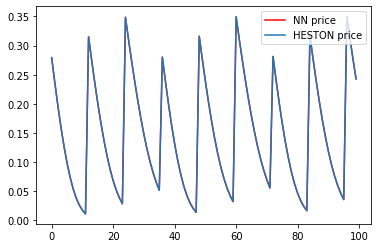

<Figure size 432x288 with 0 Axes>

In [62]:
from matplotlib import pyplot as plt
plt.plot(inv_prediction[:100], color="red", label="NN price")
plt.plot(y_test[:100], label= "HESTON price")
plt.legend()
plt.show()
plt.savefig("comparison_fair.png")

In [55]:
delta = []
for i in range(len(inv_prediction)):
    if i%1000 == 0:
        print (i)
    delta.append(abs(inv_prediction[i] - y_test[i])/y_test[i])

0
1000
2000
3000
4000
5000


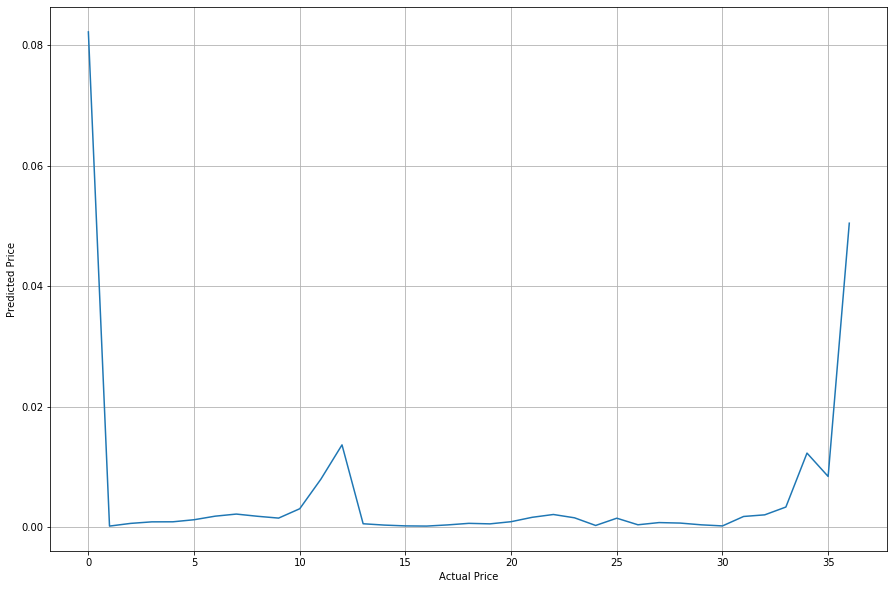

In [74]:
plt.figure(figsize = (15,10))
plt.plot(delta[2387:2424])#y_test, predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
#plt.plot([0,1], [0,1], 'r')
plt.grid(True)

In [81]:
print (scale_x.inverse_transform(X_test[335:336]))
print (scale_x.inverse_transform(X_test[371:372]))
print (scale_x.inverse_transform(X_test[2387:2388]))
print (scale_x.inverse_transform(X_test[2424:2425]))

print (scale_x.inverse_transform(X_test[2399:2400]))

[[ 2.    0.02  0.4  -0.5   0.05  0.1   1.    1.35]]
[[ 2.    0.02  0.4  -0.5   0.06  0.1   1.    1.35]]
[[ 2.5   0.02  0.4  -0.5   0.05  0.1   1.    1.35]]
[[ 2.5   0.02  0.4  -0.5   0.06  0.1   1.5   0.8 ]]
[[ 2.5   0.02  0.4  -0.5   0.05  0.1   1.5   1.35]]


/Users/sani/tesi_sidorela/heston.py:11: RuntimeWarning: divide by zero encountered in cdouble_scalars
  g1 = (xi+d)/(xi-d)
/Users/sani/tesi_sidorela/heston.py:11: RuntimeWarning: invalid value encountered in cdouble_scalars
  g1 = (xi+d)/(xi-d)
/Users/sani/tesi_sidorela/heston.py:25: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return 1/2 + 1/np.pi * quad(integrand, 1e-15, right_lim, limit=2000 )[0]


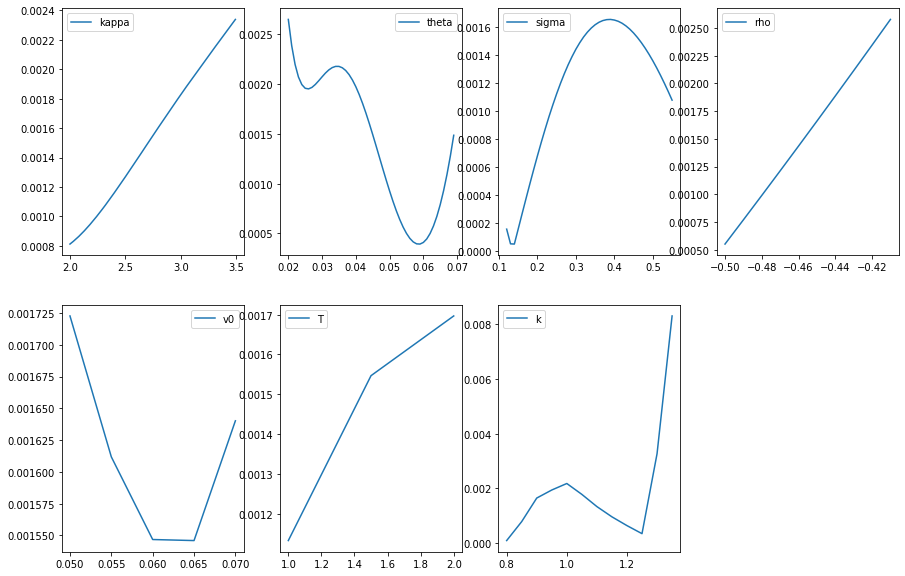

In [61]:
#Sarebbe utile fare questo plot in funzione dei vari parametri,
#pero` sono tanti ed e` complicato percio` inizia con il plot semplice
#di cui sopra poi vediamo se serve qualcosa di piu` complicato.
import numpy as np
from heston import fourier_call_price_2

params = {"kappa":np.arange(2, 3.5, 0.01),
          "theta": np.arange(0.02, 0.07, 0.001),
          "sigma": np.arange(0.1, 0.55, 0.01),     
          "rho": np.arange(-0.5, -0.4, 0.01),
          "v0": np.arange(0.05,0.07,0.005), 
          "r":0.1,
          "T": [1., 1.5, 2],
          "k": np.arange(0.8, 1.4, 0.05)}

means = {k:np.mean(v) for k,v in params.items()}
index = 1

plt.figure(figsize=(15, 10))
for k, v in params.items():
    if k == 'r':
        continue
    X = dict(means)
    x_plot = []
    y_plot = []
    for x in params[k]:
        X[k] = x
        y_plot.append(fourier_call_price_2(**X))
        x_plot.append(list(X.values()))
    #print (x_plot[:10])
    trans = scale_x.transform(x_plot)
    #print (trans[:10])
    predict = model.predict(trans)
    #print (predict.T[0][:10])
    inv_predict = scale_y.inverse_transform(predict)
    #print (inv_predict[:10])
    
    # predict.T[0] serve per trasformare le predizioni in una lista
    diff = (abs(inv_predict.T[0]-y_plot))/y_plot
    #print (inv_predict.T[0])
    #print (y_plot)
    sub = plt.subplot(3, 3, index)
    plt.plot(params[k], diff, label=k)
    sub.legend()
    index += 1  
        
plt.show()